Họ và tên: Nguyễn Thị Thảo Hiền

MSSV: 19521488

In [93]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [94]:
df1=pd.read_csv("https://raw.githubusercontent.com/nguyenthithaohien/1/main/Salary_Data.csv")
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [95]:
df2=pd.read_csv("https://raw.githubusercontent.com/nguyenthithaohien/1/main/50_Startups.csv")
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [96]:
df3=pd.read_csv("https://raw.githubusercontent.com/nguyenthithaohien/1/main/Position_Salaries.csv")
df3

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Simple LinearRegression

In [97]:
kf=KFold(n_splits=2, random_state=None, shuffle=False)
X = df1["YearsExperience"]
Y=df1["Salary"]
for train_index, test_index in kf.split(X):
    X_train = X[train_index].values.reshape(1,-1)
    X_test = X[test_index].values.reshape(1,-1)
    Y_train = Y[train_index].values.reshape(1,-1)
    Y_test = Y[test_index].values.reshape(1,-1)

In [98]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [99]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_pred = clf.predict(X_test)

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 46175.73333333333
Mean Squared Error: 2284156877.866667
Root Mean Squared Error: 47792.853836809816


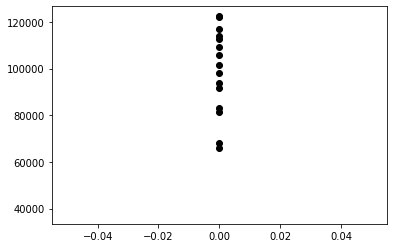

In [102]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show()

# Multiple linear regression

In [103]:
X=df2.drop("Profit",1).values
y=df2["Profit"].values
y = y.reshape(len(y),1)
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X=X[:, 1:]
X=(X-X.mean())/X.std()
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

In [104]:
kf=KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    Y_train = y[train_index]
    Y_test = y[test_index]

In [105]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_pred = clf.predict(X_test)

In [107]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 62231.47204671717
Mean Squared Error: 4418114610.787518
Root Mean Squared Error: 66468.89957557232


# Support Vector Regression

In [108]:
kf=KFold(n_splits=2, random_state=None, shuffle=False)
X = df3["Level"].values
Y=df3["Salary"].values
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    Y_train = Y[train_index]
    Y_test = Y[test_index]

In [109]:
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)

In [110]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [111]:
clf = SVR()
clf.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
y_pred = clf.predict(X_test)

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 370000.0
Mean Squared Error: 232499282462.1967
Root Mean Squared Error: 482181.7939970325


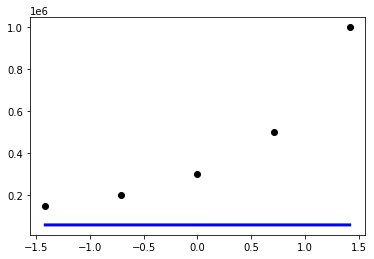

In [114]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show()

# Random Forest Regression

In [115]:
kf=KFold(n_splits=2, random_state=None, shuffle=False)
X = df3["Level"].values
Y=df3["Salary"].values
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    Y_train = Y[train_index]
    Y_test = Y[test_index]

In [116]:
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)

In [117]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [118]:
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
y_pred = clf.predict(X_test)

In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 363550.0
Mean Squared Error: 216215314500.0
Root Mean Squared Error: 464989.5853672424


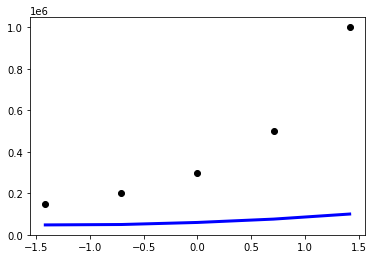

In [121]:
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show()